# Vitamin B12 Analysis

In [1]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
conn = MySQLdb.connect(host = 'localhost', user = 'root', passwd = 'mysql')

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute('use health_camp')

0

In [5]:
cursor.execute('select age, eating_habits, gender, Q29, Q30, Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, R_TSH, R_B12 from profile, questions, reports where profile.P_Id = questions.P_Id and questions.R_Id = reports.R_Id and R_TSH != "NULL"')
B12 = pd.DataFrame(list(cursor.fetchall()), columns = ['Age', 'Eating Habits', 'Gender', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'R_TSH', 'R_B12'])
B12.head()

,Age,Eating Habits,Gender,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,R_TSH,R_B12
0,38,Vegetarian,Female,1,0.0,1,0,Household,0,1.0,0.0,0.0,0,0,0
1,38,Vegetarian,Male,1,0.0,0,0,Office,0,0.0,0.0,1.0,0,0,1
2,20,Vegetarian,Female,1,NaN,0,0,Household,1,0.0,0.0,NaN,0,0,None
3,25,Non - Vegetarian,Female,1,0.0,1,0,Outdoor,1,0.0,0.0,0.0,0,0,None
4,51,Non - Vegetarian,Female,0,0.0,1,0,Office,1,0.0,0.0,0.0,0,0,0


In [6]:
B12.describe()

,Age,Q29,Q30,Q31,Q32,Q34,Q35,Q36,Q37,Q38
count,63.000000,63.000000,62.000000,63.000000,63.000000,63.000000,62.000000,55.000000,62.000000,63.000000
mean,47.444444,0.285714,0.387097,0.444444,0.047619,0.650794,0.451613,0.109091,0.322581,0.206349
std,14.731771,0.455383,0.491062,0.500895,0.214669,0.480548,0.501716,0.314627,0.471280,0.407935
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B12 vs Eating Habits

In [7]:
B12['Count'] = np.repeat(1, 63)
pivot = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Eating Habits'], aggfunc=np.sum)
pivot

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian
R_B12,,,
0,1,7,20
1,1,3,5


In [8]:
stat = stats.chi2_contingency(pivot)
stat

(1.1452380952380952,
 0.5640462385391659,
 2,
 array([[ 1.51351351,  7.56756757, 18.91891892],
        [ 0.48648649,  2.43243243,  6.08108108]]))

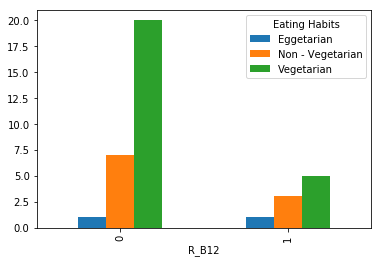

In [9]:
pivot.plot(kind='bar')

In [10]:
Total_B12 = [pivot.iloc[0, :] + pivot.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot.append(Total_B12)
Total_EH = pivot['Eggetarian'] + pivot['Non - Vegetarian'] + pivot['Vegetarian']
piv['Total Eating Habits'] = Total_EH
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_RE = (piv['Eggetarian']/piv['Total Eating Habits'])*100
Percentage_RNV = (piv['Non - Vegetarian']/piv['Total Eating Habits'])*100
Percentage_RV = (piv['Vegetarian']/piv['Total Eating Habits'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Eggetarian'] = Percentage_RE
piv['Percentage Non - Vegetarian'] = Percentage_RNV
piv['Pecentage Vegetarian'] = Percentage_RV
piv

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian,Total Eating Habits,Percentage Eggetarian,Percentage Non - Vegetarian,Pecentage Vegetarian
0,1.0,7.0,20.0,28.0,3.571429,25.000000,71.428571
1,1.0,3.0,5.0,9.0,11.111111,33.333333,55.555556
Total B12,2.0,10.0,25.0,NaN,NaN,NaN,NaN
Percentage 0,50.0,70.0,80.0,NaN,NaN,NaN,NaN
Percentage 1,50.0,30.0,20.0,NaN,NaN,NaN,NaN


### B12 vs Gender

In [11]:
pivot1 = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Gender'], aggfunc=np.sum)
pivot1

Gender,Female,Male
R_B12,,
0,19,9
1,4,5


In [12]:
stat1 = stats.chi2_contingency(pivot1)
stat1

(0.747920363797693, 0.38713545568121366, 1, array([[17.40540541, 10.59459459],
        [ 5.59459459,  3.40540541]]))

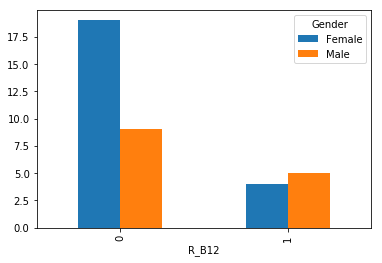

In [13]:
pivot1.plot(kind='bar')

In [14]:
Total_B12 = [pivot1.iloc[0, :] + pivot1.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot1.append(Total_B12)
Total_Gender = pivot1['Female'] + pivot1['Male']
piv['Total Gender'] = Total_Gender
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv['Female']/piv['Total Gender'])*100
Percentage_R1 = (piv['Male']/piv['Total Gender'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Female'] = Percentage_R0
piv['Percentage Male'] = Percentage_R1
piv

Gender,Female,Male,Total Gender,Percentage Female,Percentage Male
0,19.000000,9.000000,28.0,67.857143,32.142857
1,4.000000,5.000000,9.0,44.444444,55.555556
Total B12,23.000000,14.000000,NaN,NaN,NaN
Percentage 0,82.608696,64.285714,NaN,NaN,NaN
Percentage 1,17.391304,35.714286,NaN,NaN,NaN


In [15]:
Q = ((piv.iloc[1, 0] * piv.iloc[0, 1]) - (piv.iloc[1, 1] * piv.iloc[0, 0]))/((piv.iloc[1, 0] * piv.iloc[0, 1]) + (piv.iloc[1, 1] * piv.iloc[0, 0]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.45038167938931295
Odd's Ratio:  0.37894736842105264


### B12 vs Junk Food Consumption

In [16]:
pivot2 = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Q29'], aggfunc=np.sum)
pivot2

Q29,0,1
R_B12,,
0,21,7
1,7,2


In [17]:
stat2 = stats.chi2_contingency(pivot2)
stat2

(0.07705420131015368, 0.7813298845128778, 1, array([[21.18918919,  6.81081081],
        [ 6.81081081,  2.18918919]]))

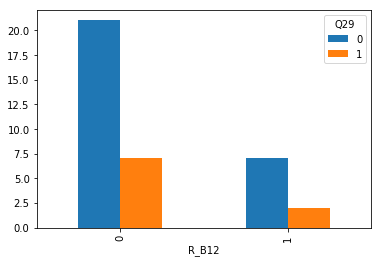

In [18]:
pivot2.plot(kind='bar')

In [19]:
Total_B12 = [pivot2.iloc[0, :] + pivot2.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot2.append(Total_B12)
Total_JFC = pivot2.iloc[:, 0] + pivot2.iloc[:, 1]
piv['Total JFC'] = Total_JFC
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total JFC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total JFC'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q29,0,1,Total JFC,Percentage 0,Percentage 1
0,21.0,7.000000,28.0,75.000000,25.000000
1,7.0,2.000000,9.0,77.777778,22.222222
Total B12,28.0,9.000000,NaN,NaN,NaN
Percentage 0,75.0,77.777778,NaN,NaN,NaN
Percentage 1,25.0,22.222222,NaN,NaN,NaN


In [20]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.07692307692307693
Odd's Ratio:  1.1666666666666667


### B12 vs Supplement Consumptions

In [21]:
pivot3 = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Q30'], aggfunc=np.sum)
pivot3

Q30,0.0,1.0
R_B12,,
0,17,11
1,6,3


In [22]:
stat3 = stats.chi2_contingency(pivot3)
stat3

(0.005585748792270529,
 0.9404232782503615,
 1,
 array([[17.40540541, 10.59459459],
        [ 5.59459459,  3.40540541]]))

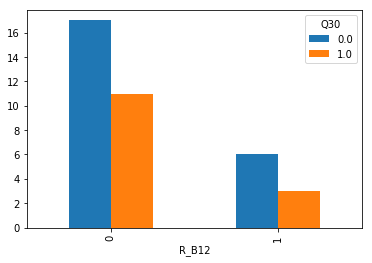

In [23]:
pivot3.plot(kind='bar')

In [24]:
Total_B12 = [pivot3.iloc[0, :] + pivot3.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot3.append(Total_B12)
Total_SC = pivot3.iloc[:, 0] + pivot3.iloc[:, 1]
piv['Total SC'] = Total_SC
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total SC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total SC'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q30,0.0,1.0,Total SC,Percentage 0,Percentage 1
0,17.000000,11.000000,28.0,60.714286,39.285714
1,6.000000,3.000000,9.0,66.666667,33.333333
Total B12,23.000000,14.000000,NaN,NaN,NaN
Percentage 0,73.913043,78.571429,NaN,NaN,NaN
Percentage 1,26.086957,21.428571,NaN,NaN,NaN


In [25]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.1282051282051282
Odd's Ratio:  1.2941176470588236


### B12 vs Pain

In [26]:
pivot4 = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Q31'], aggfunc=np.sum)
pivot4

Q31,0,1
R_B12,,
0,13,15
1,7,2


In [27]:
stat4 = stats.chi2_contingency(pivot4)
stat4

(1.580640172735761, 0.2086685058822976, 1, array([[15.13513514, 12.86486486],
        [ 4.86486486,  4.13513514]]))

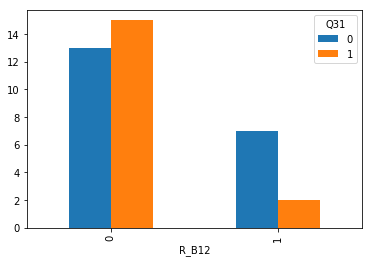

In [28]:
pivot4.plot(kind='bar')

In [29]:
Total_B12 = [pivot4.iloc[0, :] + pivot4.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot4.append(Total_B12)
Total_Pain = pivot4.iloc[:, 0] + pivot4.iloc[:, 1]
piv['Total Pain'] = Total_Pain
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total Pain'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total Pain'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q31,0,1,Total Pain,Percentage 0,Percentage 1
0,13.0,15.000000,28.0,46.428571,53.571429
1,7.0,2.000000,9.0,77.777778,22.222222
Total B12,20.0,17.000000,NaN,NaN,NaN
Percentage 0,65.0,88.235294,NaN,NaN,NaN
Percentage 1,35.0,11.764706,NaN,NaN,NaN


In [30]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.6030534351145038
Odd's Ratio:  4.038461538461538


### B12 vs RO Water Consumption

In [31]:
pivot5 = pd.pivot_table(B12, values='Count', index=['R_B12'], columns=['Q34'], aggfunc=np.sum)
pivot5

Q34,0,1
R_B12,,
0,9,19
1,3,6


In [32]:
stat5 = stats.chi2_contingency(pivot5)
stat5

(0.11758267195767205, 0.7316712103894272, 1, array([[ 9.08108108, 18.91891892],
        [ 2.91891892,  6.08108108]]))

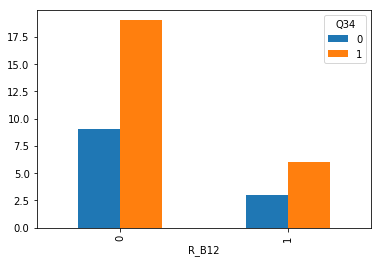

In [33]:
pivot5.plot(kind='bar')

In [34]:
Total_B12 = [pivot5.iloc[0, :] + pivot5.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot5.append(Total_B12)
Total_RO = pivot5.iloc[:, 0] + pivot5.iloc[:, 1]
piv['Total RO'] = Total_RO
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total RO'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total RO'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q34,0,1,Total RO,Percentage 0,Percentage 1
0,9.0,19.0,28.0,32.142857,67.857143
1,3.0,6.0,9.0,33.333333,66.666667
Total B12,12.0,25.0,NaN,NaN,NaN
Percentage 0,75.0,76.0,NaN,NaN,NaN
Percentage 1,25.0,24.0,NaN,NaN,NaN


In [35]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.02702702702702703
Odd's Ratio:  1.0555555555555556


### B12 vs Excessive Blood Loss during Menstruation

In [41]:
pivot6 = pd.pivot_table(B12[B12['Gender'] == 'Female'], values='Count', index=['R_B12'], columns=['Q36'], aggfunc=np.sum)
pivot6

Q36,0.0,1.0
R_B12,,
0,16,2
1,3,1


In [42]:
stat6 = stats.chi2_contingency(pivot6)
stat6

(0.005360623781676401,
 0.9416340109133828,
 1,
 array([[15.54545455,  2.45454545],
        [ 3.45454545,  0.54545455]]))

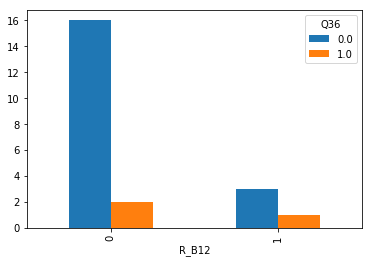

In [43]:
pivot6.plot(kind='bar')

In [44]:
Total_B12 = [pivot6.iloc[0, :] + pivot6.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot6.append(Total_B12)
Total_BL = pivot6.iloc[:, 0] + pivot6.iloc[:, 1]
piv['Total BL'] = Total_BL
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total BL'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total BL'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q36,0.0,1.0,Total BL,Percentage 0,Percentage 1
0,16.000000,2.000000,18.0,88.888889,11.111111
1,3.000000,1.000000,4.0,75.000000,25.000000
Total B12,19.000000,3.000000,NaN,NaN,NaN
Percentage 0,84.210526,66.666667,NaN,NaN,NaN
Percentage 1,15.789474,33.333333,NaN,NaN,NaN


In [45]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.45454545454545453
Odd's Ratio:  0.375
